## Task 1: Dataset Generation 
### Logistic Regression
Logistic Regression Assumptions and Characteristics
- Linear Decision Boundary: Logistic Regression assumes that classes can be separated by a linear decision boundary.

- Binary dependent variables: It takes the assumption that the dependent variable must be binary or dichotomous, meaning it can take only two values. For more than two categories SoftMax functions are used.

- Linearity relationship between independent variables and log odds: The relationship between the independent variables and the log odds of the dependent variable should be linear.

- No outliers: There should be no outliers in the dataset.

- Large sample size: The sample size is sufficiently large

https://www.geeksforgeeks.org/understanding-logistic-regression/

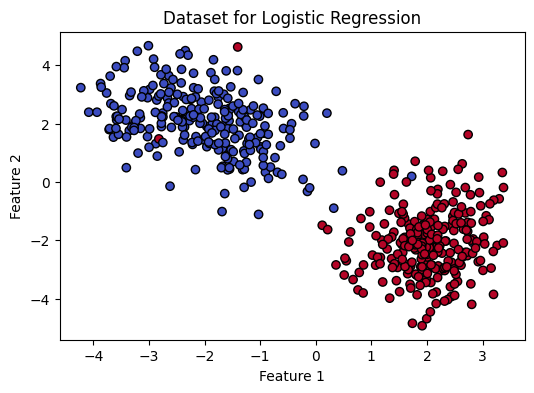

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate dataset for logistic regression
X, y = make_classification(n_samples=500, n_features=2, n_classes=2, 
                           n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, class_sep=2.0, 
                           random_state=41)

# Scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Dataset for Logistic Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Why This Dataset is Hard to Beat
- Logistic Regression fits perfectly since it assumes a linear decision boundary.

- LDA also works but might be slightly less flexible.

- QDA will struggle since the data does not follow a quadratic boundary.

- Decision Trees (unpruned) may overfit small noise.

- SVM with RBF will introduce unnecessary complexity.

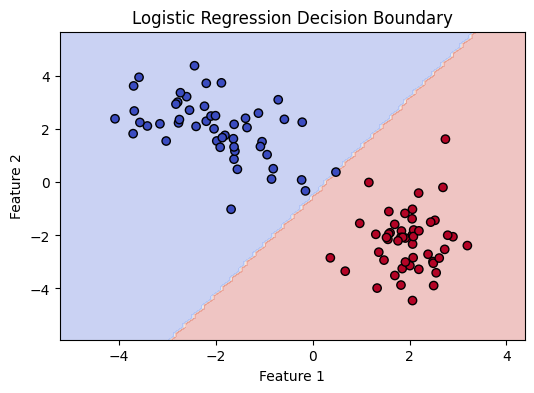

Test accuracy is: 1.0


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# Create meshgrid
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))

# Predict for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(6, 4))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
print(f"Test accuracy is: {accuracy}")


### Linear Discriminant Analysis - LDA
LDA Assumptions and Characteristics
- Gaussian Distribution: Data within each class should follow a Gaussian distribution.

- Equal Covariance Matrices: Covariance matrices of the different classes should be equal.

- Linear Separability: A linear decision boundary should be sufficient to separate the classes.

https://www.geeksforgeeks.org/ml-linear-discriminant-analysis/

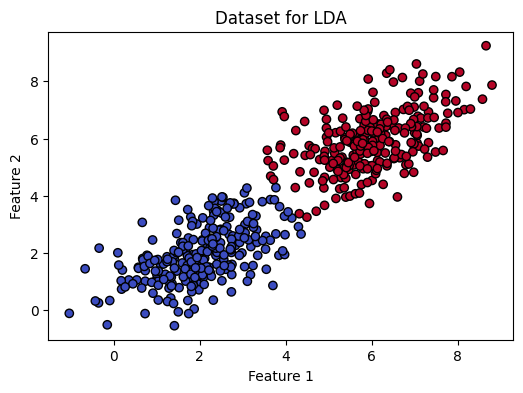

In [50]:
np.random.seed(41)
n_lda_samples = 500
class_0 = np.random.multivariate_normal(mean=[2,2], cov=[[1, 0.5], [0.5, 1]], size=n_lda_samples//2)
class_1 = np.random.multivariate_normal(mean=[6,6], cov=[[1, 0.5], [0.5, 1]], size=n_lda_samples//2)

X_lda = np.vstack((class_0, class_1))
y_lda = np.hstack((np.zeros(n_lda_samples//2), np.ones(n_lda_samples//2)))

plt.figure(figsize=(6, 4))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_lda, cmap='coolwarm', edgecolors='k')
plt.title("Dataset for LDA")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

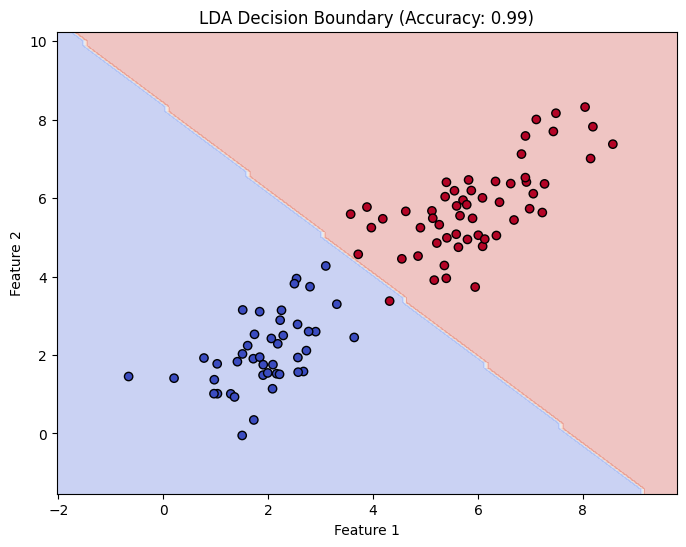

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X_train, X_test, y_train, y_test = train_test_split(X_lda, y_lda, test_size=0.2, random_state=41)

lda = LDA()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
lda_accuracy = accuracy_score(y_test, y_pred_lda)

# Decision boundary plotting
xx, yy = np.meshgrid(np.linspace(X_lda[:, 0].min()-1, X_lda[:, 0].max()+1, 100),
                     np.linspace(X_lda[:, 1].min()-1, X_lda[:, 1].max()+1, 100))

Z_lda = lda.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_lda, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k')
plt.title(f"LDA Decision Boundary (Accuracy: {lda_accuracy:.2f})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Why This Dataset is Hard to Beat for LDA
- LDA works best because the data follows a Gaussian distribution, and both classes have equal covariance. This allows LDA to find the optimal linear boundary.

- Logistic Regression also performs well since it assumes a linear decision boundary, similar to LDA, but it does not explicitly model class distributions.

- QDA (Quadratic Discriminant Analysis) struggles because it assumes different covariance structures for each class, while our dataset has equal variances.

- Decision Trees without pruning overfit since they create overly complex boundaries that capture small variations in the data rather than general trends.

- Decision Trees with max depth of 2 perform decently but may not generalize as well as LDA due to their simplicity.

- SVM with a linear kernel performs similarly to Logistic Regression, as it also finds a linear boundary but without modeling class distributions.

- SVM with an RBF kernel unnecessarily complicates the classification by trying to fit a nonlinear boundary when a simple linear one suffices.